In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import nltk
from nltk.corpus import stopwords

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

In [4]:
df = pd.read_csv("spam_text.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
stop_words = stopwords.words('english')

def text_preprocessing(text):
    if pd.isna(text):
        return ""
    
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    text = " ".join(
        word for word in text.split()
        if word not in stop_words
    )
    return text

In [8]:
df['Message_clean'] = df['Message'].apply(text_preprocessing)
df[['Message', 'Message_clean']].head()

,Message,Message_clean
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [9]:
X = df['Message_clean']
y = df['Category']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [11]:
pipeline_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])


In [ ]:
pipeline_knn = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier(
        n_neighbors=5,
        metric='cosine'
    ))
])

In [14]:
pipeline_nb.fit(X_train, y_train)
pipeline_knn.fit(X_train, y_train)

,steps,"[('tfidf', ...), ('knn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [16]:
y_pred_nb = pipeline_nb.predict(X_test)
y_pred_knn = pipeline_knn.predict(X_test)

In [ ]:
print("=== NAIVE BAYES ===")
print("Accuracy :", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall   :", recall_score(y_test, y_pred_nb))
print("F1-Score :", f1_score(y_test, y_pred_nb))

=== NAIVE BAYES ===
Accuracy : 0.9632286995515695
Precision: 1.0
Recall   : 0.7248322147651006
F1-Score : 0.8404669260700389


In [ ]:
print(classification_report(
    y_test,
    y_pred_nb,
    target_names=['ham','spam']
))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [19]:
print("=== KNN ===")
print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall   :", recall_score(y_test, y_pred_knn))
print("F1-Score :", f1_score(y_test, y_pred_knn))

=== KNN ===
Accuracy : 0.967713004484305
Precision: 0.9747899159663865
Recall   : 0.7785234899328859
F1-Score : 0.8656716417910447


In [20]:
print(classification_report(
    y_test,
    y_pred_knn,
    target_names=['ham','spam']
))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       0.97      0.78      0.87       149

    accuracy                           0.97      1115
   macro avg       0.97      0.89      0.92      1115
weighted avg       0.97      0.97      0.97      1115



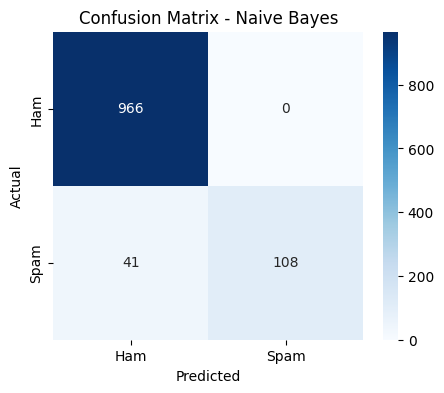

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_nb,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Ham','Spam'],
    yticklabels=['Ham','Spam']
)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

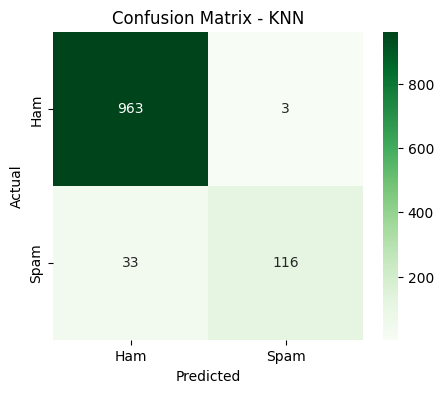

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_knn,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=['Ham','Spam'],
    yticklabels=['Ham','Spam']
)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

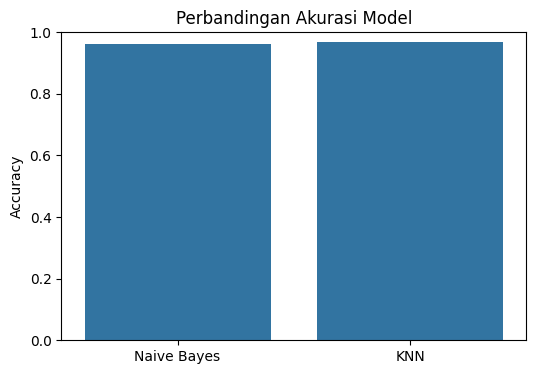

In [24]:
models = ['Naive Bayes', 'KNN']
accuracy_scores = [
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_knn)
]

plt.figure(figsize=(6,4))
sns.barplot(
    x=models,
    y=accuracy_scores
)
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Model')
plt.show()

In [26]:
sample_text = [
    "Congratulations you won free cash prize",
    "Please submit the assignment by tonight"
]

sample_clean = [text_preprocessing(text) for text in sample_text]

print("Naive Bayes Prediction :", pipeline_nb.predict(sample_clean))
print("KNN Prediction         :", pipeline_knn.predict(sample_clean))

Naive Bayes Prediction : [1 0]
KNN Prediction         : [1 0]
